# EDA

The goal for this competition is to predict the sale price of houses based on a number of features. There are quite a few features, so it will be challenging to visualize them and decide which to use in our model.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## First look at info(). 
- There are 80 features
- dtypes are int64, float64, and object (ie strings)
- Looks like the majority of features don't have an Nan values, but some few do

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Figure out how to get list of variables that have nulls

I'd like to get a list of which variables are numeric/not also.

In [5]:
# extract numeric features ?
#num_features = 
# data.apply(type)
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#data.select_dtypes(include=numerics)
X = data._get_numeric_data()
X = X.iloc[:,0:-1]
X.head()
#X.fillna(method='ffill')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


## Features to add?
- years since remodel (=YrSold-YearRemodAdd). The absolute year remodeled probably doesn't matter; how long ago does
- age of house (YrSold-YearBuilt)

## Look at the distribution of the target variable (SalePrice)
- distribution is skewed (has longer tail at large values)
- log10 of SalePrice looks normally dist.

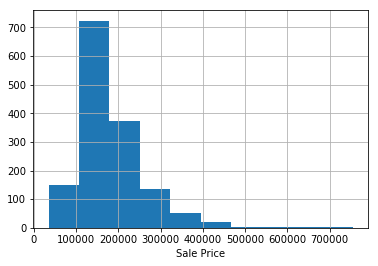

In [5]:
plt.hist(data.SalePrice)
plt.grid()
plt.xlabel('Sale Price')

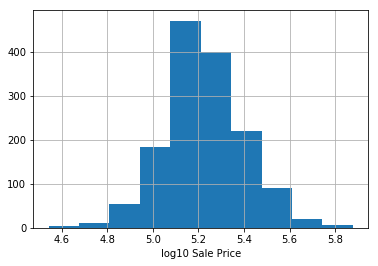

In [6]:
plt.hist(np.log10(data.SalePrice))
plt.grid()
plt.xlabel('log10 Sale Price')

In [ ]:
# imputing null values

# Model building

In [6]:
y = data.iloc[:,-1].values

r2 for test set : 0.7267637792252164


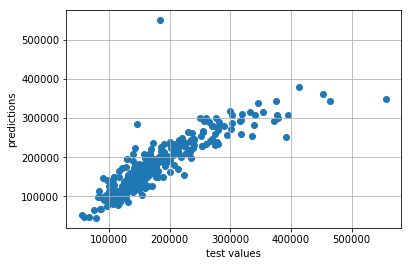

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37)

pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , RidgeCV() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , LassoCV() ) ])
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
plt.scatter(y_test,preds)
plt.grid()
plt.xlabel('test values')
plt.ylabel('predictions')
from sklearn.metrics import r2_score
print('r2 for test set : {}' .format(r2_score(y_test,preds)) )

r2 for test set : 0.659672811919


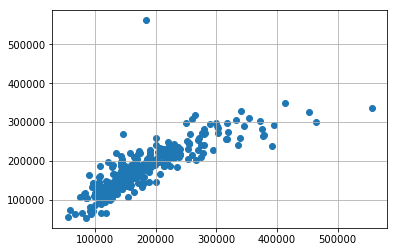

# Predict on test set and make submission

In [12]:
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
test = test._get_numeric_data()
pred_out = pipe.predict(test)

In [14]:
results = pd.DataFrame({'Id':test.Id,'SalePrice':pred_out})
results['SalePrice']=results['SalePrice'].clip_lower(0)
results.head()
results.to_csv('results.csv',header=True,index=False)

In [15]:
results.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,173129.564426
std,421.321334,72669.497911
min,1461.000000,0.000000
25%,1825.500000,121544.729666
50%,2190.000000,161768.488480
75%,2554.500000,217832.980238
max,2919.000000,650893.488032
